**Connect to google drive**

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import necessary libraries**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the Kenyan data**

In [81]:
k_customers = pd.read_csv("/content/drive/MyDrive/Kenya Customers.csv")

k_deliveries = pd.read_csv("/content/drive/MyDrive/Kenya Deliveries.csv")

k_orders = pd.read_csv("/content/drive/MyDrive/Kenya Orders.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**TASK 1**

Merge all the data

In [82]:
kenyan_data = pd.merge(k_customers,k_orders)

kenyan_data.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,2022-02-11T20:00:32.000Z,2022-02-12T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,46,65,NaN,0,-,-
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Flour & Sugar,KKFS0222,NaN,NaN,1,1670,1630,1630,1670,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,2022-02-11T20:00:32.000Z,2022-02-12T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,46,65,NaN,0,-,-
2,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Flour & Sugar,KKFS0702,NaN,NaN,2,263,247,494,526,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,2022-02-11T20:00:32.000Z,2022-02-12T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,46,65,NaN,0,-,-
3,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11138864,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,4280.0,4320,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-10T22:20:24.000Z,2022-02-10T22:21:11.000Z,2022-02-11T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,40,43,NaN,0,-,-
4,3365770,WEB,0,2021-04-21T10:23:50.000Z,en,0,55,NaN,NaN,11253217,COMPLETED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,4400,5415.0,5485,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Deliver tomorrow morning by 6.00a.m,4.49,2022-02-16T20:50:20.000Z,2022-02-16T20:47:52.000Z,2022-02-17T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,70,54,NaN,0,-,-


**TASK 2: DATA CLEANING**

**EDA**

**Kenyan Customers**

In [83]:
k_customers.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
0,3144837,WEB,0,2021-03-15T17:13:19.000Z,en,0,0,NaN,NaN
1,3174590,WEB,0,2021-03-20T14:15:11.000Z,en,0,0,NaN,NaN
2,3181998,WEB,0,2021-03-21T15:36:51.000Z,en,0,0,NaN,NaN
3,3191244,WEB,0,2021-03-23T08:54:00.000Z,en,0,367,NaN,NaN
4,3274222,WEB,0,2021-04-06T13:52:39.000Z,en,0,0,NaN,NaN


The columns:

1.CustomerID -  The customer ID. Unique

2.Last Used Platform - Platform used to access the site

3.IsBlocked

4.Created at - When the account was created

5.Language - Language prefence	

6.Outstanding Amount	

7.Loyalty Points - Points earned from shopping

8.Number of employees

9.Upload restuarant location

In [84]:
#search for null values
k_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer ID                 4177 non-null   int64  
 1   Last Used Platform          4177 non-null   object 
 2   Is Blocked                  4177 non-null   int64  
 3   Created At                  4177 non-null   object 
 4   Language                    4177 non-null   object 
 5   Outstanding Amount          4177 non-null   int64  
 6   Loyalty Points              4177 non-null   int64  
 7   Number of employees         3139 non-null   float64
 8   Upload restuarant location  19 non-null     object 
dtypes: float64(1), int64(4), object(4)
memory usage: 293.8+ KB


In [85]:
#find unique values 
k_customers['Last Used Platform'].value_counts()

k_customers['Is Blocked'].value_counts()

k_customers['Language'].value_counts()

k_customers['Outstanding Amount'].value_counts()

0    4177
Name: Outstanding Amount, dtype: int64

Upload restuarant location -  has very few values. Drop it

Last Used Platform - No unique values, they all use web

Is Blocked - 97 are blocked

Language - No unique values

Outstanding Amount - No unique values

Number of employees - 40% is null

In [86]:
#drop columns
k_customers = k_customers.drop(['Upload restuarant location','Last Used Platform','Language','Outstanding Amount','Number of employees'], axis = 1)

k_customers.head()

,Customer ID,Is Blocked,Created At,Loyalty Points
0,3144837,0,2021-03-15T17:13:19.000Z,0
1,3174590,0,2021-03-20T14:15:11.000Z,0
2,3181998,0,2021-03-21T15:36:51.000Z,0
3,3191244,0,2021-03-23T08:54:00.000Z,367
4,3274222,0,2021-04-06T13:52:39.000Z,0


In [87]:
#Calculate how many days they have been members
from datetime import datetime
import pytz

timezone = pytz.timezone("UTC")

current = pd.to_datetime('now')
current = timezone.localize(current)#convert the timezone

days = (current - pd.to_datetime(k_customers['Created At'], dayfirst=True)).dt.days

#create a column
k_customers['Days'] = days


In [88]:
#drop column Created At
k_customers = k_customers.drop(['Created At'], axis = 1)
k_customers.head()

,Customer ID,Is Blocked,Loyalty Points,Days
0,3144837,0,0,343
1,3174590,0,0,338
2,3181998,0,0,337
3,3191244,0,367,335
4,3274222,0,0,321


In [89]:
#Checking for duplicates
duplicate = k_customers[k_customers.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Customer ID,Is Blocked,Loyalty Points,Days


**Data Vsualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


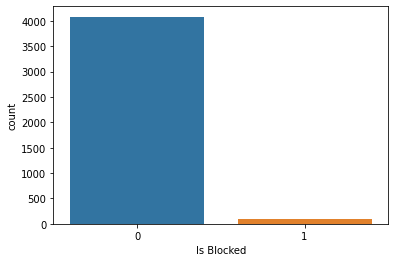

In [90]:
#Relationship between blocked and days
sns.countplot(k_customers['Is Blocked'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


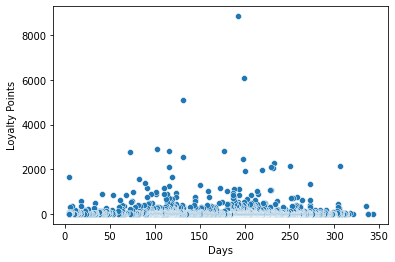

In [91]:
#Relationship between loyalty points and days
sns.scatterplot(k_customers['Days'],k_customers['Loyalty Points'])

**Kenya Deliveries**

In [92]:
k_deliveries.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,12,KSh 300.00,-,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN
2,368109621,"YR-11265175,0",3.681096e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:46:43 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.25,36.883330,NaN,-,Order_Details,10,KSh 19900.00,-,KSh 0.00,KSh 0.00,KSh 400.00,19500,CASH,-,-,-,NaN,NaN
3,368105817,"YR-11265015,0",3.681058e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:37:16 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4400.00,-,KSh 0.00,KSh 0.00,KSh 50.00,4350,CASH,-,-,-,NaN,NaN
4,368098308,"YR-11264651,0",3.680983e+29,Default Team,Delivery,Urgently deliver by 9.30am in the morning,-,-,-,-,Topup Mama,17 Feb 2022 04:19:53 pm,18 Feb 2022 09:00:00 am,-,Unassigned,-,0,-,-1.282722,36.743347,NaN,-,Order_Details,1,KSh 180.00,-,-,-,-,-,-,-,-,-,NaN,NaN


In [93]:
k_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44983 entries, 0 to 44982
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                44983 non-null  int64  
 1   Order_ID               44983 non-null  object 
 2   Relationship           44983 non-null  float64
 3   Team_Name              44983 non-null  object 
 4   Task_Type              44983 non-null  object 
 5   Notes                  13873 non-null  object 
 6   Agent_ID               44983 non-null  object 
 7   Agent_Name             44983 non-null  object 
 8   Distance(m)            44983 non-null  object 
 9   Total_Time_Taken(min)  44983 non-null  object 
 10  Pick_up_From           44983 non-null  object 
 11  Start_Before           44983 non-null  object 
 12  Complete_Before        44983 non-null  object 
 13  Completion_Time        44983 non-null  object 
 14  Task_Status            44983 non-null  object 
 15  Re

In [94]:
#drop columns with more than 30% null values

threshold =0.7
k_deliveries = k_deliveries[k_deliveries.columns[k_deliveries.isnull().mean()<threshold]]

In [95]:
k_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44983 entries, 0 to 44982
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                44983 non-null  int64  
 1   Order_ID               44983 non-null  object 
 2   Relationship           44983 non-null  float64
 3   Team_Name              44983 non-null  object 
 4   Task_Type              44983 non-null  object 
 5   Notes                  13873 non-null  object 
 6   Agent_ID               44983 non-null  object 
 7   Agent_Name             44983 non-null  object 
 8   Distance(m)            44983 non-null  object 
 9   Total_Time_Taken(min)  44983 non-null  object 
 10  Pick_up_From           44983 non-null  object 
 11  Start_Before           44983 non-null  object 
 12  Complete_Before        44983 non-null  object 
 13  Completion_Time        44983 non-null  object 
 14  Task_Status            44983 non-null  object 
 15  Re

In [96]:
#find unique values 
k_deliveries['Team_Name'].value_counts()

k_deliveries['Task_Type'].value_counts()

k_deliveries['Total_Time_Taken(min)'].value_counts()

k_deliveries['Pick_up_From'].value_counts()

k_deliveries['Rating'].value_counts()

k_deliveries['Review'].value_counts()

k_deliveries['Promo_Applied'].value_counts()

k_deliveries['Subtotal'].value_counts()

k_deliveries['Payment_Type'].value_counts()

k_deliveries['Pricing'].value_counts()

-    28842
0    16141
Name: Pricing, dtype: int64

Team_Name - No unique value

Task_Type - Only one pickup

Pick_up_From - Some data cannot be understood

Conserining delivery guys: Team_Name	Task_Type	Notes	Agent_ID	Agent_Name	Distance(m)	Total_Time_Taken(min)	Pick_up_From

ASSUMPTION: Replaced missing competion_time with current time

Ref_Images - Many are missing values

Rating - only 94 ratings. Assumption: The rest were not filled by the customers.

Review - Majority of the data lacks reviews

Promo_Applied - None was applied

Task_Details_QTY, Task_Details_AMOUNT, Task_Category, Earning - Dont fully comprehend what it means

Tip, Delivery_Charges - Have unknown entries

Subtotal - More than half the data lacks sub total

Payment_Type - More than half the data lacks payment type

Pricing - More than half the data lacks pricing

This data contains alot of data conserning delivery and delivery guys

In [97]:
#calculate completion time in minutes

#fill missing completion_time
#current date and time
now = datetime.now()

#Replace with current time
k_deliveries['Complete_Before'] = k_deliveries['Complete_Before'].replace('-' ,now)

#Replace unknown strings with current time
k_deliveries['Start_Before'] = k_deliveries['Start_Before'].replace(['Topup Mama'],now)
k_deliveries['Start_Before'] = k_deliveries['Start_Before'].replace(['Kibanda Topup'],now)
k_deliveries['Start_Before'] = k_deliveries['Start_Before'].replace([' Kibanda Topup'],now)

before = pd.Series(k_deliveries['Start_Before'])
after = pd.Series(k_deliveries['Complete_Before'])
k_deliveries['Completion_Time'] = (pd.to_datetime(after, dayfirst=True)- pd.to_datetime(before, dayfirst=True)).dt.total_seconds() / 60

**Check for duplicates**

In [98]:
duplicate = k_deliveries[k_deliveries.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
47,367981165,"YR-11260641,0",3.679812e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 01:00:00 pm,18 Feb 2022 08:00:00 am,1140.000000,Unassigned,-,0,-,-1.31259,36.810930,-,Order_Details,2,KSh 120.00,-,-,-,-,-,-,-,-,-
151,367758375,"YR-11253143,0",3.677584e+29,Default Team,Delivery,NaN,1092722,Leonard Hilton,16382,98.97,Topup Mama,16 Feb 2022 08:47:12 pm,17 Feb 2022 09:00:00 am,732.800000,Completed,-,0,-,-1.2856465,36.770610,-,Order_Details,5,KSh 750.00,-,-,-,-,-,-,-,0,0
173,367758375,"YR-11253143,0",3.677584e+29,Default Team,Delivery,NaN,1092722,Leonard Hilton,16382,98.97,Topup Mama,16 Feb 2022 08:47:12 pm,17 Feb 2022 09:00:00 am,732.800000,Completed,-,0,-,-1.2856465,36.770610,-,Order_Details,6,KSh 180.00,-,-,-,-,-,-,-,0,0
1032,366504043,"YR-11197785,0",3.665040e+29,Default Team,Delivery,NaN,1092722,Leonard Hilton,39315,527.97,Topup Mama,13 Feb 2022 08:55:36 pm,14 Feb 2022 09:00:00 am,724.400000,Completed,-,0,-,-1.2856465,36.770610,-,Order_Details,5,KSh 1000.00,-,-,-,-,-,-,-,0,0
1033,366504043,"YR-11197785,0",3.665040e+29,Default Team,Delivery,NaN,1092722,Leonard Hilton,39315,527.97,Topup Mama,13 Feb 2022 08:55:36 pm,14 Feb 2022 09:00:00 am,724.400000,Completed,-,0,-,-1.2856465,36.770610,-,Order_Details,5,KSh 1000.00,-,-,-,-,-,-,-,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41319,297210138,"YR-7541267,0",2.972101e+29,Default Team,Delivery,NaN,1060795,Brian Mutua,9944,119.78,Kibanda Topup,25 Jul 2021 01:08:36 pm,26 Jul 2021 08:00:00 am,1131.400000,Completed,-,0,-,-1.283311,36.887173,-,Order_Details,2,KSh 120.00,-,-,-,-,-,-,-,-,-
41496,296730531,"YR-7500752,0",2.967305e+29,Default Team,Delivery,To delivered tomorrow at 8am,1060799,Josphat Rarimi,7060,67.02,Kibanda Topup,23 Jul 2021 01:34:57 pm,24 Jul 2021 08:00:00 am,1105.050000,Completed,-,0,-,-1.220059,36.891839,-,Order_Details,15,KSh 900.00,-,-,-,-,-,-,-,-,-
41728,295961371,"YR-7463688,0",2.959614e+29,Default Team,Delivery,NaN,1001204,Kennedy Mokua,-,111.75,Kibanda Topup,21 Jul 2021 01:00:00 pm,22 Jul 2021 08:00:00 am,1140.000000,Completed,-,0,-,-1.3142077,36.807455,-,Order_Details,5,KSh 300.00,-,-,-,-,-,-,-,-,-
42753,289741115,"YR-7197498,0",2.897411e+29,Default Team,Delivery,Deliver tomorrow early morning before 8 a.m,1015702,Colborn Odero,-,392.33,Kibanda Topup,06 Jul 2021 09:14:44 pm,07 Jul 2021 08:00:00 am,645.266667,Completed,-,0,-,-1.30052,36.806500,-,Order_Details,5,KSh 400.00,-,-,-,-,-,-,-,-,-


In [99]:
k_deliveries = k_deliveries.drop_duplicates(subset=None, inplace=False)

In [100]:
new_k_deliveries = pd.read_csv("/content/drive/MyDrive/Kenya Deliveries.csv",
                               usecols=['Order_ID','Relationship','Completion_Time']) 

**Kenya orders**

In [101]:
k_orders.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,4400,4350.0,4400,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,50,-,NaN,0,-,-
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,NaN,NaN,1,180,130,130,180,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
2,11264651,ORDERED,Flour & Sugar,KKFS0702,NaN,NaN,6,263,247,1482,1578,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,NaN,NaN,10,65,58,580,650,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
4,11264651,ORDERED,Beverages,KKBE0105,NaN,NaN,1,249,208.5,208.5,249,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-


In [102]:
k_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12242 entries, 0 to 12241
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order ID                  12242 non-null  int64  
 1   Order Status              12242 non-null  object 
 2   Category Name             12236 non-null  object 
 3   SKU                       12239 non-null  object 
 4   Customization Group       0 non-null      float64
 5   Customization Option      0 non-null      float64
 6   Quantity                  12242 non-null  int64  
 7   Unit Price                12242 non-null  int64  
 8   Cost Price                12242 non-null  object 
 9   Total Cost Price          12242 non-null  object 
 10  Total Price               12242 non-null  int64  
 11  Order Total               12242 non-null  float64
 12  Sub Total                 12242 non-null  int64  
 13  Tax                       12242 non-null  object 
 14  Delive

In [103]:
#drop columns with more than 30% null values

threshold =0.7
k_orders = k_orders[k_orders.columns[k_orders.isnull().mean()<threshold]]

k_orders.head()

,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Checkout Template Name,Checkout Template Value
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250,4250,4400,4350.0,4400,-,-,-,-,0,CASH,-,-,0,KSh,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,0,-,50,-,0,-,-
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130,130,180,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-
2,11264651,ORDERED,Flour & Sugar,KKFS0702,6,263,247,1482,1578,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,10,65,58,580,650,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-
4,11264651,ORDERED,Beverages,KKBE0105,1,249,208.5,208.5,249,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,0,-,-,-,0,-,-


In [104]:
duplicate = k_orders[k_orders.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Flat Discount,Checkout Template Name,Checkout Template Value
9419,10644933,COMPLETED,Cooking Fat & Oil,KKCO0620,9,4275,4230,38070,38475,39970.0,40145,-,-,-,-,0,CASH,-,-,0,KSh,4158465,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,9.8,2022-01-15T10:51:25.000Z,2022-01-16T13:00:00.000Z,2022-01-17T08:00:00.000Z,0,-,175,401,0,-,-
9421,10644933,COMPLETED,Flour & Sugar,KKFS0222,1,1670,1630,1630,1670,39970.0,40145,-,-,-,-,0,CASH,-,-,0,KSh,4158465,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,9.8,2022-01-15T10:51:25.000Z,2022-01-16T13:00:00.000Z,2022-01-17T08:00:00.000Z,0,-,175,401,0,-,-


In [105]:
k_orders = k_orders.drop_duplicates(subset=None, inplace=False)

In [106]:
k_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12240 entries, 0 to 12241
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 12240 non-null  int64  
 1   Order Status             12240 non-null  object 
 2   Category Name            12234 non-null  object 
 3   SKU                      12237 non-null  object 
 4   Quantity                 12240 non-null  int64  
 5   Unit Price               12240 non-null  int64  
 6   Cost Price               12240 non-null  object 
 7   Total Cost Price         12240 non-null  object 
 8   Total Price              12240 non-null  int64  
 9   Order Total              12240 non-null  float64
 10  Sub Total                12240 non-null  int64  
 11  Tax                      12240 non-null  object 
 12  Delivery Charge          12240 non-null  object 
 13  Tip                      12240 non-null  object 
 14  Discount              

In [107]:
#find unique values 
k_orders['Quantity'].value_counts()

1      7612
2      1864
3       698
5       544
4       418
10      318
6       211
12      144
7        84
8        83
15       57
20       48
18       37
9        26
13       15
30       15
24       14
11        9
40        8
14        6
16        5
36        4
17        4
25        3
108       2
22        1
84        1
96        1
72        1
33        1
35        1
27        1
34        1
60        1
100       1
50        1
Name: Quantity, dtype: int64

In [108]:
k_orders['Distance (in km)'].describe()

count    12240.000000
mean        17.741560
std        209.583252
min          0.980000
25%          5.030000
50%          7.460000
75%         12.760000
max       6157.060000
Name: Distance (in km), dtype: float64

Order Status - Completed,cancelled, ordered

Category Name - Flour & Sugar,Cooking Fat & Oil,Salt & Seasoning,Cleaning & Hygiene,Fruits & Vegetables,Packaging,Meat & Fish,Rice & Cereals ,Beverages,Spreads

Payment Method - CASH, Pay Later

Currency Symbol - KSh all

Store Name - Topup Mama

Pickup Address - Kilimani, Nairobi, Kenya

SKU - don't understand what that means

!!cost price, Total Cost Price,Redeemed Loyalty Points,Consumed Loyalty Points

Tax,Delivery Charge,Tip,Discount,Additional Charge,Taxable Amount,Debt Amount,Checkout Template Name,Checkout Template Value - drop. many are empty

Remaining Balance,Transaction ID,Flat Discount - all are 0

In [109]:
#create a new dataframe that has 'acceptable' columns
new_k_orders = pd.read_csv("/content/drive/MyDrive/Kenya Orders.csv",
                           usecols=['Customer ID','Order ID','Order Status', 'Category Name','Payment Method',
                                    'Total Price','Order Total','Quantity','Distance (in km)','Order Time']) 
new_k_orders.sample(5)


,Order ID,Order Status,Category Name,Quantity,Total Price,Order Total,Payment Method,Customer ID,Distance (in km),Order Time
4510,10977055,COMPLETED,Cooking Fat & Oil,1,1990,5850.0,CASH,3714151,0.98,2022-02-01T22:21:33.000Z
11949,10427957,COMPLETED,Cleaning & Hygiene,1,223,8464.0,CASH,4669823,1.21,2022-01-03T17:29:25.000Z
11303,10481502,COMPLETED,Packaging,1,35,4300.0,CASH,4639341,5.26,2022-01-06T18:16:58.000Z
9548,10634985,COMPLETED,Cooking Fat & Oil,2,8550,8653.0,CASH,4064862,13.48,2022-01-14T21:37:10.000Z
11474,10464513,COMPLETED,Flour & Sugar,2,3480,3740.0,CASH,3700182,5.24,2022-01-05T19:27:04.000Z


In [110]:
#find unique values
for x in new_k_orders.columns:
    #prinfting unique values
    print(x ,':', len(new_k_orders[x].unique()))

Order ID : 3451
Order Status : 3
Category Name : 11
Quantity : 36
Total Price : 575
Order Total : 2332
Payment Method : 2
Customer ID : 550
Distance (in km) : 319
Order Time : 3449


In [111]:
#new_k_orders = pd.get_dummies(new_k_orders)

In [112]:
new_k_orders.head()

,Order ID,Order Status,Category Name,Quantity,Total Price,Order Total,Payment Method,Customer ID,Distance (in km),Order Time
0,11265015,ORDERED,Cooking Fat & Oil,1,4400,4350.0,CASH,3755460,10.90,2022-02-17T16:36:27.000Z
1,11264651,ORDERED,Cleaning & Hygiene,1,180,7255.0,CASH,4541187,6.99,2022-02-17T16:19:05.000Z
2,11264651,ORDERED,Flour & Sugar,6,1578,7255.0,CASH,4541187,6.99,2022-02-17T16:19:05.000Z
3,11264651,ORDERED,Salt & Seasoning,10,650,7255.0,CASH,4541187,6.99,2022-02-17T16:19:05.000Z
4,11264651,ORDERED,Beverages,1,249,7255.0,CASH,4541187,6.99,2022-02-17T16:19:05.000Z


**Data Visualization**

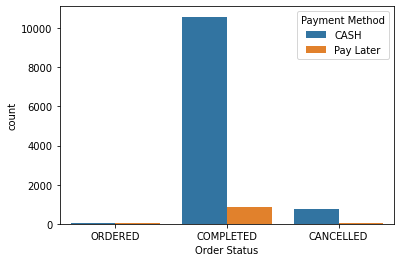

In [113]:
sns.countplot(x ="Order Status", hue ="Payment Method", data = new_k_orders)

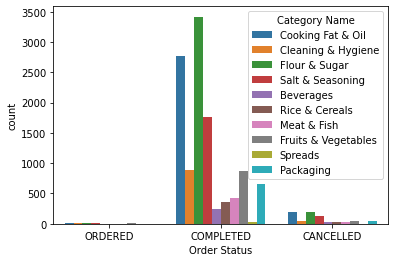

In [114]:
sns.countplot(x ="Order Status", hue ="Category Name", data = new_k_orders)

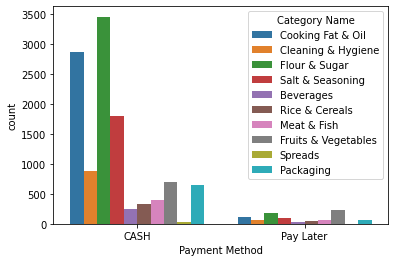

In [115]:
sns.countplot(x ="Payment Method", hue ="Category Name", data = new_k_orders)

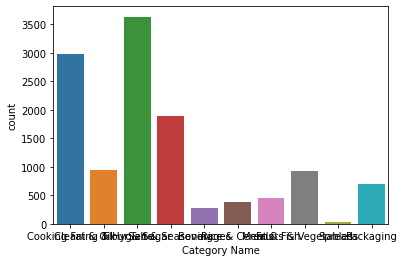

In [116]:
sns.countplot(x ="Category Name", data = new_k_orders)

**Merge datasets**

In [117]:
df = pd.merge(k_customers,new_k_orders)


df.head()

,Customer ID,Is Blocked,Loyalty Points,Days,Order ID,Order Status,Category Name,Quantity,Total Price,Order Total,Payment Method,Distance (in km),Order Time
0,3365019,0,68,306,11155410,COMPLETED,Cooking Fat & Oil,1,4320,6470.0,CASH,20.09,2022-02-11T20:02:56.000Z
1,3365019,0,68,306,11155410,COMPLETED,Flour & Sugar,1,1670,6470.0,CASH,20.09,2022-02-11T20:02:56.000Z
2,3365019,0,68,306,11155410,COMPLETED,Flour & Sugar,2,526,6470.0,CASH,20.09,2022-02-11T20:02:56.000Z
3,3365019,0,68,306,11138864,COMPLETED,Cooking Fat & Oil,1,4320,4280.0,CASH,20.09,2022-02-10T22:20:24.000Z
4,3365770,0,55,306,11253217,COMPLETED,Cooking Fat & Oil,1,4400,5415.0,CASH,4.49,2022-02-16T20:50:20.000Z


In [118]:
#check for duplicates
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Customer ID,Is Blocked,Loyalty Points,Days,Order ID,Order Status,Category Name,Quantity,Total Price,Order Total,Payment Method,Distance (in km),Order Time
2165,3937429,0,420,222,11217070,COMPLETED,Fruits & Vegetables,3,210,4900.0,CASH,7.46,2022-02-14T20:33:35.000Z
3254,4026966,0,126,206,10575803,COMPLETED,Flour & Sugar,1,1750,8253.0,CASH,8.93,2022-01-11T17:56:58.000Z
3259,4026966,0,126,206,10541189,COMPLETED,Flour & Sugar,1,1750,8229.0,CASH,8.93,2022-01-09T18:16:34.000Z
3263,4026966,0,126,206,10505247,COMPLETED,Flour & Sugar,1,1750,3390.0,CASH,11.82,2022-01-07T22:13:37.000Z
3266,4026966,0,126,206,10505095,COMPLETED,Flour & Sugar,1,1750,4250.0,CASH,8.93,2022-01-07T22:02:53.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10636,4719937,0,838,68,10616061,COMPLETED,Packaging,1,120,7740.0,CASH,4.62,2022-01-13T22:07:51.000Z
10893,4761926,0,641,61,10960194,COMPLETED,Fruits & Vegetables,1,200,2500.0,CASH,3.74,2022-01-31T22:42:59.000Z
10919,4761926,0,641,61,10797910,COMPLETED,Fruits & Vegetables,1,200,2750.0,CASH,3.74,2022-01-23T13:12:10.000Z
10960,4761926,0,641,61,10473559,COMPLETED,Fruits & Vegetables,1,190,2679.0,CASH,3.74,2022-01-06T09:41:46.000Z


In [119]:
#drop duplicates
df = df.drop_duplicates(subset=None, inplace=False)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 0 to 12241
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       12157 non-null  int64  
 1   Is Blocked        12157 non-null  int64  
 2   Loyalty Points    12157 non-null  int64  
 3   Days              12157 non-null  int64  
 4   Order ID          12157 non-null  int64  
 5   Order Status      12157 non-null  object 
 6   Category Name     12151 non-null  object 
 7   Quantity          12157 non-null  int64  
 8   Total Price       12157 non-null  int64  
 9   Order Total       12157 non-null  float64
 10  Payment Method    12157 non-null  object 
 11  Distance (in km)  12157 non-null  float64
 12  Order Time        12157 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1.3+ MB


In [121]:
df.head()

,Customer ID,Is Blocked,Loyalty Points,Days,Order ID,Order Status,Category Name,Quantity,Total Price,Order Total,Payment Method,Distance (in km),Order Time
0,3365019,0,68,306,11155410,COMPLETED,Cooking Fat & Oil,1,4320,6470.0,CASH,20.09,2022-02-11T20:02:56.000Z
1,3365019,0,68,306,11155410,COMPLETED,Flour & Sugar,1,1670,6470.0,CASH,20.09,2022-02-11T20:02:56.000Z
2,3365019,0,68,306,11155410,COMPLETED,Flour & Sugar,2,526,6470.0,CASH,20.09,2022-02-11T20:02:56.000Z
3,3365019,0,68,306,11138864,COMPLETED,Cooking Fat & Oil,1,4320,4280.0,CASH,20.09,2022-02-10T22:20:24.000Z
4,3365770,0,55,306,11253217,COMPLETED,Cooking Fat & Oil,1,4400,5415.0,CASH,4.49,2022-02-16T20:50:20.000Z


**Customer Segmentation**


**RFM ANALYSIS**

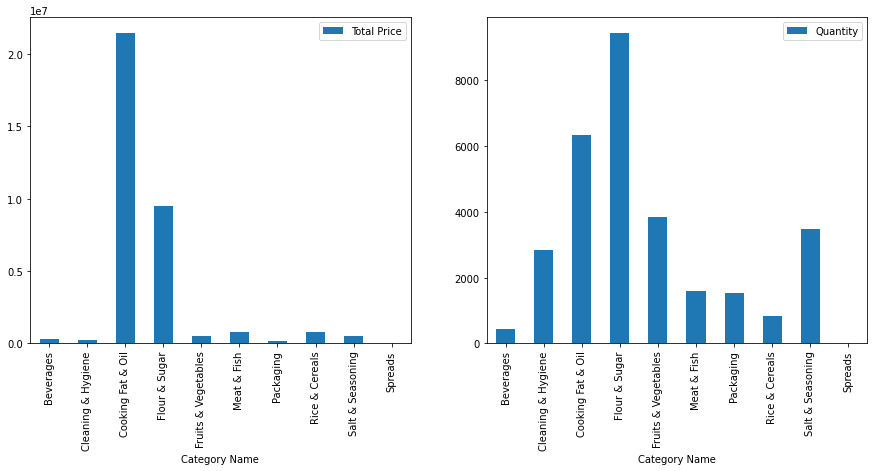

In [122]:
product_df = df[['Category Name','Total Price']]
product_df1 = df[['Category Name','Quantity']]

fig, axarr = plt.subplots(1, 2,figsize = (15,6))

product_df.groupby("Category Name").sum().plot(kind="bar",ax=axarr[0])
product_df1.groupby("Category Name").sum().plot(kind="bar",ax=axarr[1])

Cooking Fat&Oil - generate the highest revenue

Flour & sugar - are the most purchased items 

**Calculate the RFM values**

**Recency**

In [123]:
df_recency = df
df_recency = df_recency.groupby(by='Customer ID',as_index=False)['Order Time'].max()
df_recency.columns = ['Customer ID','max_date']

In [124]:
df_recency

,Customer ID,max_date
0,3365019,2022-02-11T20:02:56.000Z
1,3365770,2022-02-16T20:50:20.000Z
2,3377953,2022-02-08T10:18:44.000Z
3,3378262,2022-02-14T22:23:11.000Z
4,3385533,2022-02-12T10:21:45.000Z
...,...,...
545,5185675,2022-02-16T19:25:39.000Z
546,5188032,2022-02-17T12:07:28.000Z
547,5188161,2022-02-17T12:34:57.000Z
548,5188263,2022-02-17T12:59:40.000Z


In [125]:
reference_date = pd.to_datetime('now') #current time
reference_date = timezone.localize(reference_date)#convert the timezone




df_recency['Recency'] = df_recency['max_date'].apply(lambda row: (reference_date - pd.to_datetime(row)).days)
df_recency.drop('max_date',inplace=True,axis=1)
df_recency[['Customer ID','Recency']].head()

,Customer ID,Recency
0,3365019,9
1,3365770,4
2,3377953,13
3,3378262,6
4,3385533,9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


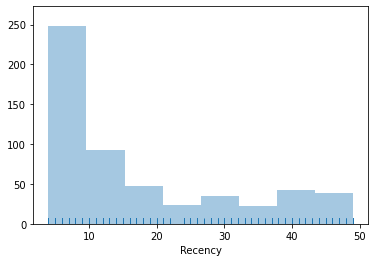

In [126]:
sns.distplot(df_recency.Recency,bins=8,kde=False,rug=True)

In [127]:
df_frequency = df
df_frequency = df_frequency.groupby(by='Customer ID',as_index=False)['Order ID'].nunique()
df_frequency.columns = ['Customer ID','Frequency']
df_frequency.head()

,Customer ID,Frequency
0,3365019,2
1,3365770,12
2,3377953,2
3,3378262,10
4,3385533,10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


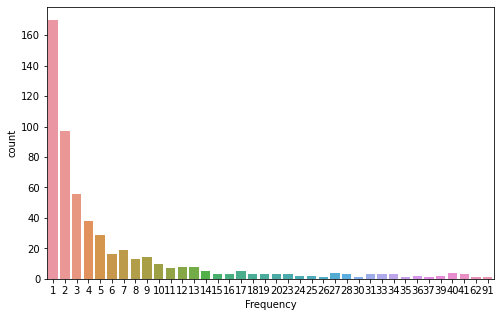

In [128]:
plt.figure(figsize=(8,5))
sns.countplot(df_frequency['Frequency'])

In [129]:
df_monetary = df
df_monetary = df_monetary.groupby(by='Customer ID',as_index=False)['Order Total'].sum()

df_monetary.columns = ['Customer ID','Monetary']
df_monetary.head()

,Customer ID,Monetary
0,3365019,23690.0
1,3365770,238283.0
2,3377953,93840.0
3,3378262,186326.0
4,3385533,74791.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


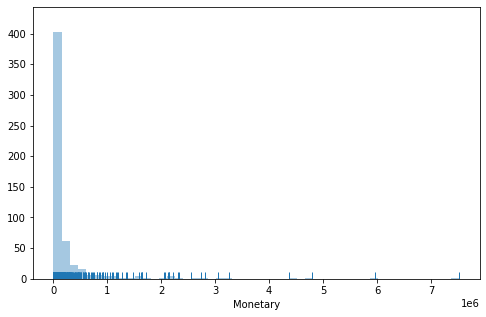

In [130]:
plt.figure(figsize=(8,5))
sns.distplot(df_monetary.Monetary,kde=False,rug=True)

In [131]:
#Merge RFM
f_m = pd.merge(df_monetary,df_frequency)
r_f_m = pd.merge(f_m,df_recency)

In [132]:
r_f_m.head()

,Customer ID,Monetary,Frequency,Recency
0,3365019,23690.0,2,9
1,3365770,238283.0,12,4
2,3377953,93840.0,2,13
3,3378262,186326.0,10,6
4,3385533,74791.0,10,9


**Recency vs Frequency**

Text(0, 0.5, 'Frequency')

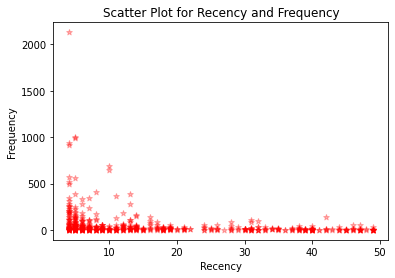

In [133]:
plt.scatter(r_f_m.groupby('Customer ID')['Recency'].sum(), df.groupby('Customer ID')['Quantity'].sum(),
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')

We can see the customers whose Recency is less than a month have high Frequency i.e the customers buying more when their recency is less.

**Frequency VS Monetary**

Text(0.5, 0, 'Monetary')

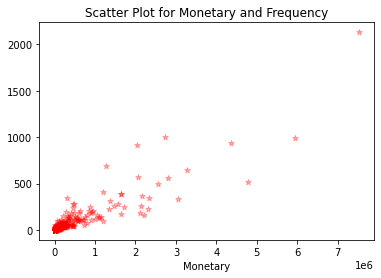

In [134]:
market_data = df.groupby('Customer ID')[['Quantity', 'Order Total']].sum()

plt.scatter(market_data['Order Total'], market_data['Quantity'],
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')

We can see, customers buying frequently are spending more amount

**Recency Vs Frequency Vs Monetary**

Text(0, 0.5, 'Frequency')

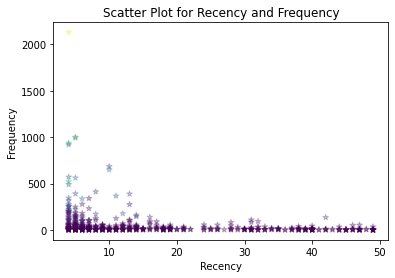

In [135]:
Monetary = df.groupby('Customer ID')['Order Total'].sum()
plt.scatter(r_f_m.groupby('Customer ID')['Recency'].sum(), df.groupby('Customer ID')['Quantity'].sum(),
            marker = '*', alpha = 0.3,c=Monetary)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

From the above plot, we can say the customers whose Recency is less have high Frequency but less Monetary.

**Bucketing**

We can bucket the customers based on the above 3 Factors(RFM). like, put all the customers whose Recency is less than 20 days in 1 bucket. Similarly, customers whose Recency is greater than 20 days and less than 120 days in another bucket. we will apply the same concept for Frequency and Monetary also.

Depending on the Company’s objectives, Customers can be segmented in several ways. so that it is financially possible to make marketing campaigns.

**Bucketing Recency**

In [153]:
def R_Score(x):
    if x['Recency']>20 and x['Recency'] <=120:
        recency = 2
    else:
        recency = 1
    return recency

r_f_m['R'] = r_f_m.apply(R_Score,axis=1)

**Bucketing Frequency**

In [154]:
def F_Score(x):
    if x['Frequency'] >3 and x['Frequency'] <=6:
        recency = 2
    else:
        recency = 1
    return recency

r_f_m['F'] = r_f_m.apply(F_Score,axis=1)

**Bucketing Monetary**

In [155]:
M_Score = pd.qcut(r_f_m['Monetary'],q=3,labels=range(1,4))

r_f_m = r_f_m.assign(M = M_Score.values)

**R-F-M Score**

In [156]:
def RFM_Score(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
    
r_f_m['RFM_Score'] = r_f_m.apply(RFM_Score,axis=1)

In [157]:
r_f_m.head()

,Customer ID,Monetary,Frequency,Recency,R,F,M,RFM_Score,segment
0,3365019,23690.0,2,9,1,1,2,112,Others
1,3365770,238283.0,12,4,1,1,3,113,Others
2,3377953,93840.0,2,13,1,1,2,112,Others
3,3378262,186326.0,10,6,1,1,3,113,Others
4,3385533,74791.0,10,9,1,1,2,112,Others


If the R-F-M score of any customer is 3-3-3. His Recency is good, frequency is more and Monetary is more. So, he is a Big spender. 

Similarly, if his score is 2-3-3, then his Recency is better and frequency and monetary are good. This customer hasn’t purchased for some time but he buys frequently and spends more.

In [158]:
segment = [0]*len(r_f_m)

best = list(r_f_m.loc[r_f_m['RFM_Score']=='333'].index)
lost_cheap = list(r_f_m.loc[r_f_m['RFM_Score']=='111'].index)
lost = list(r_f_m.loc[r_f_m['RFM_Score']=='133'].index)
lost_almost = list(r_f_m.loc[r_f_m['RFM_Score']=='233'].index)

for i in range(0,len(r_f_m)):
    if r_f_m['RFM_Score'][i]=='111':
        segment[i]='Lost Cheap Customers'
    elif r_f_m['RFM_Score'][i]=='133':
        segment[i]='Lost Customers'
    elif r_f_m['RFM_Score'][i]=='233':
        segment[i]='Almost Lost Customers'
    elif r_f_m['RFM_Score'][i]=='333':
        segment[i]='Best Customers'
    else:
      segment[i]='Others'

In [159]:
r_f_m['segment'] = segment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


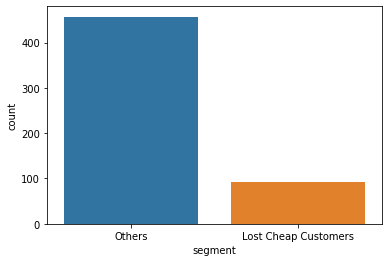

In [160]:
sns.countplot(r_f_m['segment'])